In [1]:
import pandas as pd
import numpy as np
import sys, logging
from datetime import datetime

root = logging.getLogger()
root.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

sys.path.append("../src/")
from turnstile import turnstile

In [2]:
start = datetime(2020, 3, 14)
end = datetime(2020, 4, 14)

In [3]:
raw_data = turnstile.download_turnstile_data(start_date=start)

2020-04-17 13:34:07,029 - root - INFO - Downloading turnstile data


In [4]:
turnstile_data = turnstile.get_hourly_turnstile_data(start_date=start, end_date=end)

2020-04-17 13:34:15,493 - root - INFO - Downloading turnstile data
2020-04-17 13:34:21,455 - root - INFO - Cleaning turnstile data
2020-04-17 13:34:21,641 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-04-17 13:34:33,758 - root - INFO - Start creating hourly turnstile data
2020-04-17 13:38:00,345 - root - INFO - Finish interpolating
2020-04-17 13:38:07,632 - root - INFO - Finish concatenating the result


In [6]:
turnstile_by_station = turnstile.aggregate_turnstile_data_by_station(turnstile_data, '/content/jupyter/mta-accessibility/data/crosswalk/ee_turnstile.csv')

In [9]:
i = 0
for key in turnstile_by_station:
    if i==0:
        df = pd.DataFrame(turnstile_by_station[key])
    else:
        df = pd.concat(df,turnstile_by_station[key])

In [47]:
turnstile_by_station[key].head()

,datetime,STATION,UNIT,ENTRIES,EXITS,cleaned_entries,cleaned_exits,cleaned_entries_diff,cleaned_exists_diff,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,clean_lines,remote
539,2020-03-14,CHAMBERS ST,R029,1.742779e+09,8.072634e+08,283403.0,283403.0,353.0,353.0,World Trade Center,EL326,Park Pl & Church St (SE corner) to ADA access ...,MN,E,EL,Y,Y,E,R029
540,2020-03-14,CHAMBERS ST,R029,1.742779e+09,8.072634e+08,283403.0,283403.0,353.0,353.0,World Trade Center,EL23X,Vesey St. to Oculus Main Level with access to ...,MN,E,EL,Y,Y,E,R029
1012,2020-03-14,PARK PLACE,R029,1.023194e+07,9.954794e+06,28883.0,28883.0,32.0,32.0,World Trade Center,EL326,Park Pl & Church St (SE corner) to ADA access ...,MN,E,EL,Y,Y,E,R029
1013,2020-03-14,PARK PLACE,R029,1.023194e+07,9.954794e+06,28883.0,28883.0,32.0,32.0,World Trade Center,EL23X,Vesey St. to Oculus Main Level with access to ...,MN,E,EL,Y,Y,E,R029
1187,2020-03-14,WORLD TRADE CTR,R029,1.600995e+09,1.843946e+09,162053.0,162053.0,165.0,165.0,World Trade Center,EL326,Park Pl & Church St (SE corner) to ADA access ...,MN,E,EL,Y,Y,E,R029


In [16]:
turnstile_data.head()

,STATION,UNIT,SCP,ENTRIES,EXITS,cleaned_entries,cleaned_exits,cleaned_entries_diff,cleaned_exists_diff
datetime,,,,,,,,,
2020-03-14 00:00:00,WHITEHALL S-FRY,R001,00-00-00,5030877.0,2915034.0,25343.00,25343.00,26.0,26.0
2020-03-14 01:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25369.00,25369.00,26.0,26.0
2020-03-14 02:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25378.25,25378.25,9.0,9.0
2020-03-14 03:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25387.50,25387.50,9.0,9.0
2020-03-14 04:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25396.75,25396.75,9.0,9.0


In [19]:
turnstile_data.reset_index().head()

,datetime,STATION,UNIT,SCP,ENTRIES,EXITS,cleaned_entries,cleaned_exits,cleaned_entries_diff,cleaned_exists_diff
0,2020-03-14 00:00:00,WHITEHALL S-FRY,R001,00-00-00,5030877.0,2915034.0,25343.00,25343.00,26.0,26.0
1,2020-03-14 01:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25369.00,25369.00,26.0,26.0
2,2020-03-14 02:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25378.25,25378.25,9.0,9.0
3,2020-03-14 03:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25387.50,25387.50,9.0,9.0
4,2020-03-14 04:00:00,WHITEHALL S-FRY,R001,00-00-00,5030981.0,2915100.0,25396.75,25396.75,9.0,9.0


In [28]:
df = turnstile_data.reset_index()[['datetime','STATION','cleaned_entries_diff','cleaned_exists_diff']].groupby(['datetime','STATION']).sum()[['cleaned_entries_diff','cleaned_exists_diff']].reset_index()

In [29]:
df.head()

,datetime,STATION,cleaned_entries_diff,cleaned_exists_diff
0,2020-03-14,1 AV,282.0,282.0
1,2020-03-14,103 ST,342.0,342.0
2,2020-03-14,103 ST-CORONA,257.0,257.0
3,2020-03-14,104 ST,33.0,33.0
4,2020-03-14,110 ST,182.0,182.0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

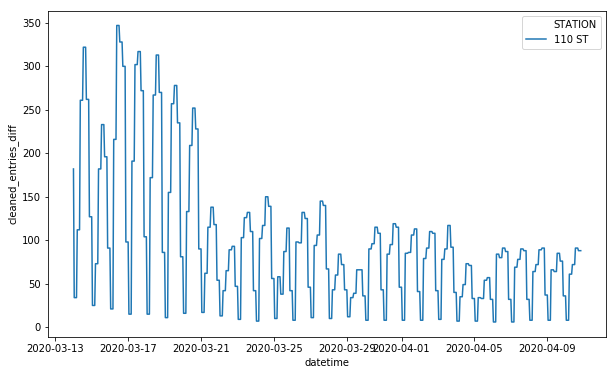

In [41]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='datetime',y='cleaned_entries_diff',hue='STATION',data=df[(df.STATION == '110 ST')])

In [44]:
v = pd.read_pickle('../data/vehicle_updates_20200417-173153')

In [45]:
v.head()

,alert.header_text.translation,current_status,current_stop_sequence,id,route_id,start_date,start_time,stop_id,stop_name,timestamp,trip_id
0,NaN,1.0,38.0,000002,1,20200417,NaN,101N,Van Cortlandt Park - 242 St,2020-04-17 17:30:33,075900_1..N03R
1,NaN,1.0,35.0,000004,1,20200417,NaN,137S,Chambers St,2020-04-17 17:28:21,075950_1..S03R
2,NaN,0.0,34.0,000006,1,20200417,NaN,107N,215 St,2020-04-17 17:31:12,076700_1..N03R
3,NaN,1.0,30.0,000008,1,20200417,NaN,132S,14 St,2020-04-17 17:30:24,076750_1..S03R
4,NaN,1.0,11.0,000110,3,20200417,NaN,132S,14 St,2020-04-17 17:30:40,078850_3..S01R
